In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt; plt.rcdefaults()

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [3]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

# pd.options.display.max_rows = 100

### DataFrame 選取元素方法

In [4]:
#import pandas as pd

#df_Pclass = pd.DataFrame(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())


# df 選取行(欄)資料
#print(df_Pclass["Pclass"])
#print(df_Pclass.Pclass)
#print("\n")
#print(df_Pclass["Survived"])
#print("\n")



# df slice僅支援列資料
#print(df_Pclass[0:3:2])  # row 0 to row 3 , step = 2 rows
#print("\n")



# ----- df原生[]方法選取row +  .loc方法選取column -----
# * Tips : 可以透過 df原生[]方法選取row +  .loc方法選取column"

#print(df_Pclass.loc[0:2, ["Pclass"]])
#print(df_Pclass.loc[0:2, ["Survived"]])
#print("\n")

# I - Exploratory data analysis

In [5]:
print("第一步 暸解資料外觀與內容")
print("\n")
#讀取資料 (是DataFrame)
train_url = "https://storage.googleapis.com/py_ml_datasets/train.csv"
train = pd.read_csv(train_url)
#用.head()了解資料的大概情況，不要用print()會比較完整而且好看
print(train.head())
#train.shape : 資料維度
print(train.shape)
print("\n")
#train.dtypes : 每一筆資料的儲存狀態(是integer, float, object等等)
print(train.dtypes)
print("\n")

print("# train.isnull() : 判斷是不是遺漏值，搭配.sum()一口氣了解有多少遺漏值")
print(train.isnull().sum())

第一步 暸解資料外觀與內容


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Feature 1 : PassengerId (捨棄)

# Feature 2 : Survived (欲預測變數)

# Feature 3 : Pclass

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363




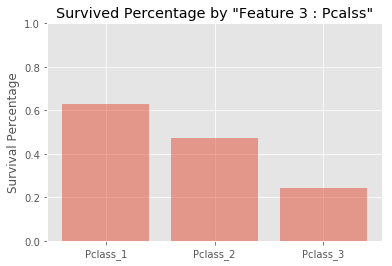



各Pclass所佔總乘客人數的比例


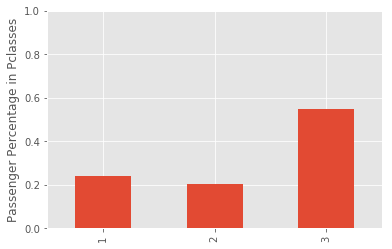

In [8]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
print("\n")

# 圖 1
objects = ['Pclass_1', 'Pclass_2', 'Pclass_3']
y_pos = np.arange(len(objects))
performance = [0.629630,0.472826,0.242363]
plt.xticks(y_pos, objects)
plt.bar(y_pos, performance, alpha=0.5)
plt.ylabel('Survival Percentage')
plt.ylim(0,1)
plt.title('Survived Percentage by "Feature 3 : Pcalss"')
plt.show()
print("\n")

# 圖 2
print("各Pclass所佔總乘客人數的比例")
train.Pclass.value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylabel('Passenger Percentage in Pclasses')
plt.ylim(0, 1)
plt.show()

# Feature 4 : Name

                                                  Name  Survived
0                                  Abbing, Mr. Anthony         0
1                          Abbott, Mr. Rossmore Edward         0
2                     Abbott, Mrs. Stanton (Rosa Hunt)         1
3                                  Abelson, Mr. Samuel         0
4                Abelson, Mrs. Samuel (Hannah Wizosky)         1
5                       Adahl, Mr. Mauritz Nils Martin         0
6                                      Adams, Mr. John         0
7       Ahlin, Mrs. Johan (Johanna Persdotter Larsson)         0
8                           Aks, Mrs. Sam (Leah Rosen)         1
9                          Albimona, Mr. Nassef Cassem         1
10                              Alexander, Mr. William         0
11                         Alhomaki, Mr. Ilmari Rudolf         0
12                                      Ali, Mr. Ahmed         0
13                                    Ali, Mr. William         0
14                       

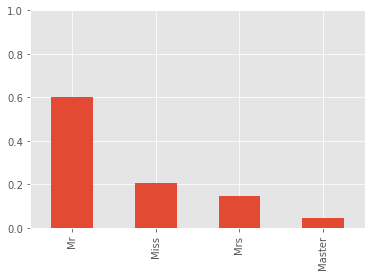

In [9]:
print (train[['Name', 'Survived']].groupby(['Name'], as_index=False).mean())
print("\n")

# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# A list with the all the different titles
titles = sorted(set([x for x in train.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

# Normalize the titles, returning 'Mr', 'Master', 'Miss' or 'Mrs'
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

# Lets create a new column for the titles
train['Title'] = train['Name'].map(lambda x: get_title(x))
# train.Title.value_counts()
# train.Title.value_counts().plot(kind='bar')

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
train['Title'] = train.apply(replace_titles, axis=1)

# Check that the number of Mr, Mrs and Miss are the same that 'male' and 'female'
print('Title column values. Males and females are the same that for the "Sex" column:')
print(train.Title.value_counts())

# Plot the result
train.Title.value_counts(normalize = True, sort = True).plot(kind='bar')
plt.ylim(0, 1)
plt.show()

# Feature 5 : Sex

      Sex  Survived
0  female  0.742038
1    male  0.188908


因為本來男生女生的乘客數量就不一樣，所以改看比例
0    0.811092
1    0.188908
Name: Survived, dtype: float64


0    0.257962
1    0.742038
Name: Survived, dtype: float64




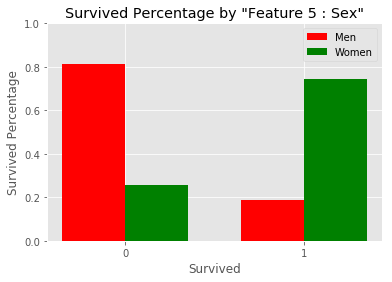

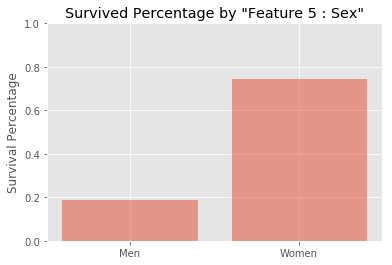



各Sex所佔總乘客人數的比例


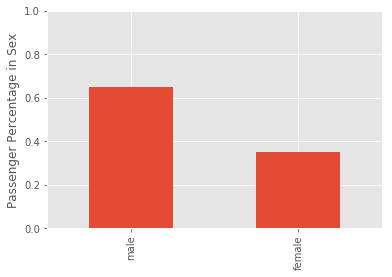

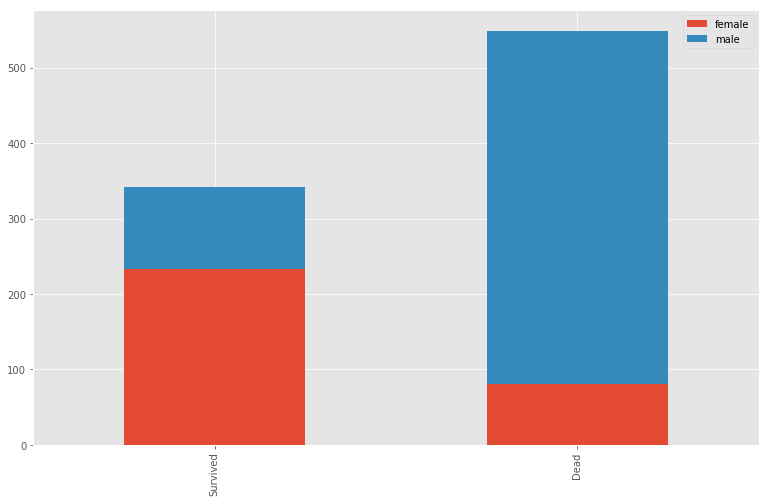

In [10]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())  # 這做法是只關心該變數內各項的存活比率
print("\n")

# 這做法列出了所有情況
print("因為本來男生女生的乘客數量就不一樣，所以改看比例")
print(train.Survived[train.Sex == 'male'].value_counts(normalize =True))
print("\n")
print(train.Survived[train.Sex == 'female'].value_counts(normalize =True, sort = False))
print("\n")


import numpy as np
import matplotlib.pyplot as plt

def bar_plotting(lst_1, lst_2, group_1, group_2):
    N = len(lst_1)
    ind = np.arange(N)
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, lst_1, width, color='r')
    rects2 = ax.bar(ind + width, lst_2, width, color='g')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels((0, 1))
    ax.set_xlabel("Survived")
    ax.set_ylabel('Survived Percentage')
    ax.legend((rects1[0], rects2[0]), (group_1, group_2))

male_survived = list(train.Survived[train.Sex == 'male'].value_counts(normalize = True, sort = False))
female_survived = list(train.Survived[train.Sex == 'female'].value_counts(normalize = True, sort = False))
bar_plotting(male_survived, female_survived, 'Men', 'Women')
plt.title('Survived Percentage by "Feature 5 : Sex"')
plt.ylim(0, 1)
plt.show()






# Bar Chart
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# 圖 1
objects = ['Men', 'Women']
y_pos = np.arange(len(objects))
performance = [0.188908,0.742038]
plt.xticks(y_pos, objects)
plt.bar(y_pos, performance, alpha=0.5)
plt.ylabel('Survival Percentage')
plt.ylim(0,1)
plt.title('Survived Percentage by "Feature 5 : Sex"')
plt.show()
print("\n")

# 圖 2
print("各Sex所佔總乘客人數的比例")
train.Sex.value_counts(normalize = True, sort = True).plot(kind='bar')
plt.ylabel('Passenger Percentage in Sex')
plt.ylim(0, 1)
plt.show()








# 圖 3
survived_sex = train[train['Survived'] == 1]['Sex'].value_counts()
dead_sex = train[train['Survived'] == 0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(13,8))
plt.show()

# Feature 6 : Age

In [11]:
train['Age'].fillna(train['Age'].median(), inplace=True)

       Age  Survived
0    22.00         0
1    38.00         1
2    26.00         1
3    35.00         1
4    35.00         0
5    28.00         0
6    54.00         0
7     2.00         0
8    27.00         1
9    14.00         1
10    4.00         1
11   58.00         1
12   20.00         0
13   39.00         0
14   14.00         0
15   55.00         1
16    2.00         0
17   28.00         1
18   31.00         0
19   28.00         1
20   35.00         0
21   34.00         1
22   15.00         1
23   28.00         1
24    8.00         0
25   38.00         1
26   28.00         0
27   19.00         0
30   40.00         0
33   66.00         0
35   42.00         0
37   21.00         0
38   18.00         0
39   14.00         1
40   40.00         0
41   27.00         0
43    3.00         1
44   19.00         1
49   18.00         0
50    7.00         0
51   21.00         0
52   49.00         1
53   29.00         1
54   65.00         0
56   21.00         1
57   28.50         0
58    5.00   

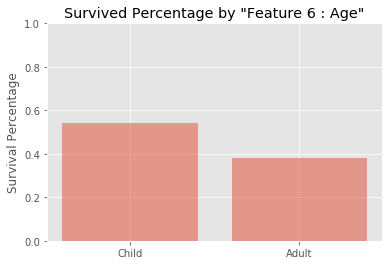

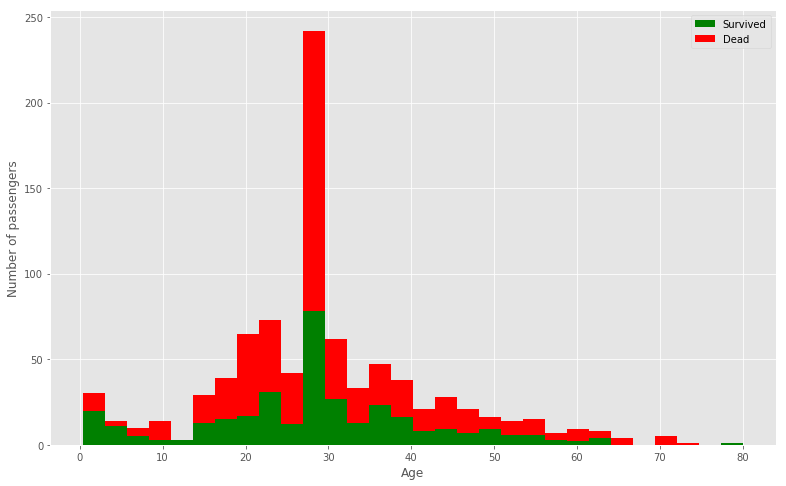

In [12]:
print (train[['Age', 'Survived']].groupby(['Age'], as_index=False).head())
print("\n")
df_age_survived = train[['Age', 'Survived']].groupby(['Age'], as_index=False)



child = pd.Series(np.empty(train.shape[0])) 
# The shape attribute for numpy arrays returns the dimensions of the array. 
# If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n.
train.Child = child
age_filter_under_18 = train.Age < 18
age_filter_above_18 = train.Age >= 18
train.Child[age_filter_under_18] = 1
train.Child[age_filter_above_18] = 0
print(train.Survived[train.Child == 1].value_counts(normalize = True, sort = False))
print(train.Survived[train.Child == 0].value_counts(normalize = True, sort = False))




# Bar Chart
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# 圖 1
objects = ['Child', 'Adult']
y_pos = np.arange(len(objects))
performance = [0.539823,0.381032]
plt.xticks(y_pos, objects)
plt.bar(y_pos, performance, alpha=0.5)
plt.ylabel('Survival Percentage')
plt.ylim(0,1)
plt.title('Survived Percentage by "Feature 6 : Age"')
plt.show()
print("\n")









figure = plt.figure(figsize=(13,8))
plt.hist([train[train['Survived'] == 1]['Age'], train[train['Survived'] == 0]['Age']], stacked = True, color = ['g','r'],
         bins = 30, label = ['Survived', 'Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()






# Feature 7 : SibSp

In [13]:
print (train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


# Feature 8 : Parch

In [14]:
print (train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


# Feature 9 : Ticket

In [15]:
print (train[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean())

                 Ticket  Survived
0                110152  1.000000
1                110413  0.666667
2                110465  0.000000
3                110564  1.000000
4                110813  1.000000
5                111240  0.000000
6                111320  0.000000
7                111361  1.000000
8                111369  1.000000
9                111426  1.000000
10               111427  1.000000
11               111428  1.000000
12               112050  0.000000
13               112052  0.000000
14               112053  1.000000
15               112058  0.000000
16               112059  0.000000
17               112277  1.000000
18               112379  0.000000
19               113028  0.000000
20               113043  0.000000
21               113050  0.000000
22               113051  0.000000
23               113055  1.000000
24               113056  0.000000
25               113059  0.000000
26               113501  0.000000
27               113503  0.000000
28            

# Feature 10 : Fare

         Fare  Survived
0      0.0000  0.066667
1      4.0125  0.000000
2      5.0000  0.000000
3      6.2375  0.000000
4      6.4375  0.000000
5      6.4500  0.000000
6      6.4958  0.000000
7      6.7500  0.000000
8      6.8583  0.000000
9      6.9500  0.000000
10     6.9750  0.500000
11     7.0458  0.000000
12     7.0500  0.000000
13     7.0542  0.000000
14     7.1250  0.000000
15     7.1417  1.000000
16     7.2250  0.250000
17     7.2292  0.266667
18     7.2500  0.076923
19     7.3125  0.000000
20     7.4958  0.333333
21     7.5208  0.000000
22     7.5500  0.250000
23     7.6292  0.000000
24     7.6500  0.250000
25     7.7250  0.000000
26     7.7292  0.000000
27     7.7333  0.500000
28     7.7375  0.500000
29     7.7417  0.000000
30     7.7500  0.352941
31     7.7750  0.187500
32     7.7875  1.000000
33     7.7958  0.333333
34     7.8000  0.000000
35     7.8292  0.500000
36     7.8542  0.230769
37     7.8750  0.000000
38     7.8792  1.000000
39     7.8875  0.000000
40     7.8958  0

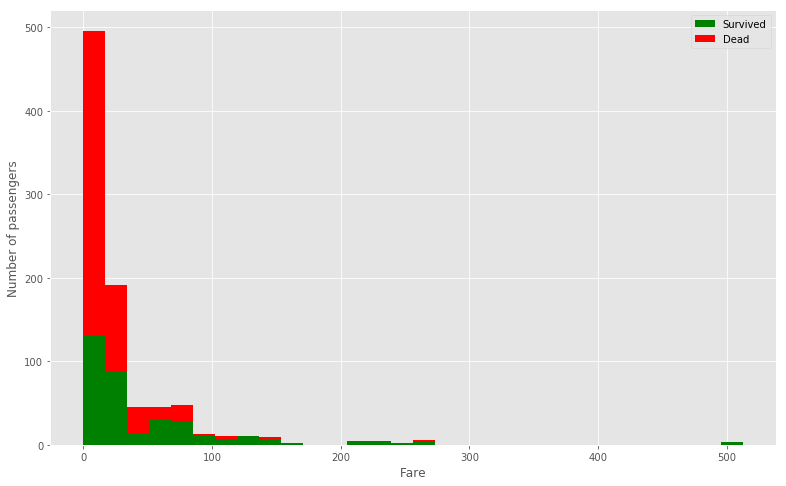

In [16]:
print (train[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean())






figure = plt.figure(figsize=(13,8))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

# Feature 11 : Cabin (遺漏值過多)

In [17]:
print (train[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean())

               Cabin  Survived
0                A10  0.000000
1                A14  0.000000
2                A16  1.000000
3                A19  0.000000
4                A20  1.000000
5                A23  1.000000
6                A24  0.000000
7                A26  1.000000
8                A31  1.000000
9                A32  0.000000
10               A34  1.000000
11               A36  0.000000
12                A5  0.000000
13                A6  1.000000
14                A7  0.000000
15              B101  1.000000
16              B102  0.000000
17               B18  1.000000
18               B19  0.000000
19               B20  1.000000
20               B22  0.500000
21               B28  1.000000
22                B3  1.000000
23               B30  0.000000
24               B35  1.000000
25               B37  0.000000
26               B38  0.000000
27               B39  1.000000
28                B4  1.000000
29               B41  1.000000
30               B42  1.000000
31      

# Feature 12 : Embarked

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


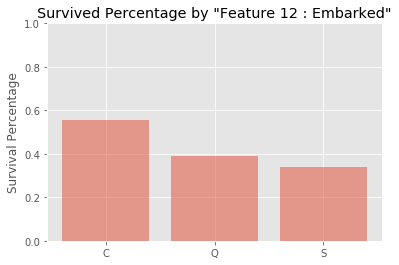



各Embarked所佔總乘客人數的比例


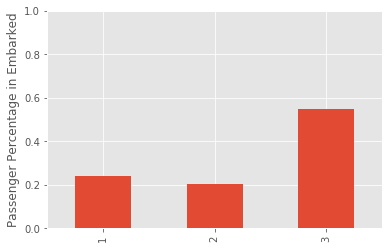

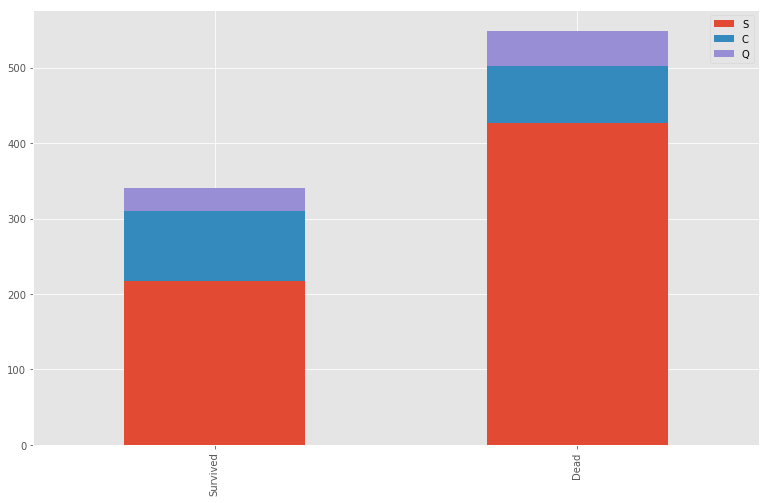

In [18]:
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())




# Bar Chart
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# 圖 1
objects = ['C', 'Q', 'S']
y_pos = np.arange(len(objects))
performance = [0.553571,0.389610,0.339009]
plt.xticks(y_pos, objects)
plt.bar(y_pos, performance, alpha=0.5)
plt.ylabel('Survival Percentage')
plt.ylim(0,1)
plt.title('Survived Percentage by "Feature 12 : Embarked"')
plt.show()
print("\n")

# 圖 2
print("各Embarked所佔總乘客人數的比例")
train.Pclass.value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylabel('Passenger Percentage in Embarked')
plt.ylim(0, 1)
plt.show()











survived_embark = train[train['Survived']==1]['Embarked'].value_counts()
dead_embark = train[train['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))
plt.show()

In [19]:
train_ = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/train.csv")

PassengerId = train_['PassengerId']
print('follow is passengerid')
print(PassengerId[:5])

print (train_[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

print (train_[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

# 计算名字的长度
train_['Name_length'] = train_['Name'].apply(len)
# 将旅客是否住在头等舱二值化
train_['Has_Cabin'] = train_["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
# 发现房子的大小
train_['FamilySize'] = train_['SibSp'] + train_['Parch'] + 1
# 发现是否独居
train_['IsAlone'] = 0
train_.loc[train_['FamilySize'] == 1, 'IsAlone'] = 1
# 移除所有穿上人员的 Embarked 的NULL值
train_['Embarked'] = train_['Embarked'].fillna('S')
train_['Fare'] = train_['Fare'].fillna(train_['Fare'].median())
train_['CategoricalFare'] = pd.qcut(train_['Fare'], 4)
age_avg = train_['Age'].mean()
age_std = train_['Age'].std()
age_null_count = train_['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train_['Age'][np.isnan(train_['Age'])] = age_null_random_list
train_['Age'] = train_['Age'].astype(int)
train_['CategoricalAge'] = pd.cut(train_['Age'], 5)
# 定义函数导出旅客的Title
def get_title(name):
   title_search = re.search('([A-Za-z]+)\.',name)
   if title_search:
       return title_search.group(1)
   return ''
train_['Title'] = train_['Name'].apply(get_title)
train_['Title'] = train_['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_['Title'] = train_['Title'].replace('Mlle', 'Miss')
train_['Title'] = train_['Title'].replace('Ms', 'Miss')
train_['Title'] = train_['Title'].replace('Mme', 'Mrs')
#  映射 Sex
train_['Sex'] = train_['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
# 映射 titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_['Title'] = train_['Title'].map(title_mapping)
train_['Title'] = train_['Title'].fillna(0)
# 映射 Embarked
train_['Embarked'] = train_['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
# 映射 Fare
train_.loc[ train_['Fare'] <= 7.91, 'Fare'] = 0
train_.loc[(train_['Fare'] > 7.91) & (train_['Fare'] <= 14.454), 'Fare'] = 1
train_.loc[(train_['Fare'] > 14.454) & (train_['Fare'] <= 31), 'Fare']   = 2
train_.loc[ train_['Fare'] > 31, 'Fare'] = 3
train_['Fare'] = train_['Fare'].astype(int)
# 映射 Age
train_.loc[ train_['Age'] <= 16, 'Age'] = 0
train_.loc[(train_['Age'] > 16) & (train_['Age'] <= 32), 'Age'] = 1
train_.loc[(train_['Age'] > 32) & (train_['Age'] <= 48), 'Age'] = 2
train_.loc[(train_['Age'] > 48) & (train_['Age'] <= 64), 'Age'] = 3
train_.loc[train_['Age'] > 64, 'Age']

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']

train_ = train_.drop(drop_elements, axis = 1)

train_ = train_.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

# test_  = test_.drop(drop_elements, axis = 1)


# 可视化特征之间的关联



import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

colormap = plt.cm.viridis

plt.figure(figsize=(12,12))

plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(train_.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()



#1.图中可以告诉我们特征之间没有太多的强关联
#这对我们的模型来说是一个好消息，因为这意味着训练数据中没有太多的冗余信息，我们每一个特征都可以提供一个独立的信息
#2.两个关联最强的特征是Family size and Parch


#最后让我们生成一个 pairplots图来观察每个特征与其它特征之间的关系
g = sns.pairplot(train_[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',

      u'FamilySize', u'Title']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )

g.set(xticklabels=[])

follow is passengerid
0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908


C:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NameError: name 're' is not defined

# Feature 6 : Age  x  Feature 10 : Fare

In [ ]:
plt.figure(figsize=(13,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)
plt.show()

# Feature 3 : Pclass  x  Feature 10 : Fare

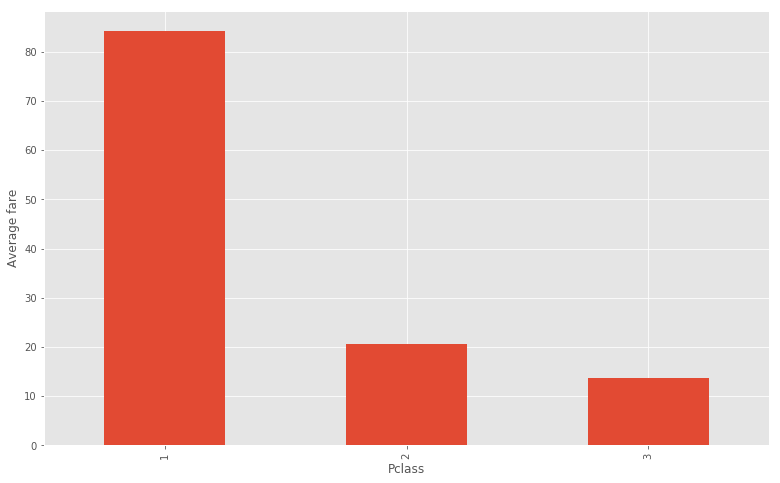

In [20]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
train.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(13,8), ax = ax)
plt.show()

# II - Feature engineering

In the previous part, we flirted with the data and spotted some interesting correlations. However, we couldn't manage to analyze more complicated features like the names or the tickets because these required further processing. 

In this part, we'll focus on the ways to transform these specific features in such a way they become easily fed to machine learning algorithms. 

We'll also create, or "engineer" some other features that'll be useful in building the model. 

We will break our code in separate functions for more clarity. But first let's define a print function that asserts whether or not a feature has been processed.



## 了解資料外觀，把train, test data結合在一起，以方便進行Feature engineering

In [21]:
def status(feature):

    print('Processing', feature, ': ok')

In [22]:
def get_combined_data():
    # reading train data
    train = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/train.csv")
    
    # reading test data
    test = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/test.csv")

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived', 1, inplace=True) #"Survived" in index = 1
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [23]:
train = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/train.csv")
test = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/test.csv")

In [24]:
targets = train.Survived
targets.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [25]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
train.drop('Survived', 1, inplace=True)

In [27]:
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
combined = train.append(test)
combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [29]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 97.2+ KB


In [30]:
combined.shape

(1309, 11)

In [31]:
print("# combined.isnull() : 判斷是不是遺漏值，搭配.sum()一口氣了解有多少遺漏值")
print(combined.isnull().sum())

# combined.isnull() : 判斷是不是遺漏值，搭配.sum()一口氣了解有多少遺漏值
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


## 發現Age, Fare, Cabin, Embarked有遺漏值，開始填補

In [32]:
def get_titles():

    global combined
    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)

In [33]:
get_titles()

In [34]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [35]:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

## 填補 Age 的遺漏值

 用分組過後，各組的 medain來填補遺漏值 ； 不像最初的做法是用全部資料的 median 來填補
 而上面的是前置準備 :
 1. 分組                grouped = combined.groupby(['Sex','Pclass','Title'])
 2. 找出各組中位數       grouped.median()

In [36]:
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row):
        if row['Sex'] == 'female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
    
    combined.Age = combined.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('age')

In [37]:
process_age()

Processing age : ok


In [38]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 102.3+ KB


## 捨棄變數 Names ， 衍生出新變數Title

In [39]:
def process_names():
    
    global combined
    # we clean the Name variable
    combined.drop('Name', axis = 1, inplace = True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix = 'Title') # prefix 即 column name
    combined = pd.concat([combined,titles_dummies], axis = 1)
    
    # removing the title variable
    combined.drop('Title', axis = 1, inplace = True)
    
    status('names')

In [40]:
process_names()

Processing names : ok


## 填補 Fare 遺漏值

In [41]:
def process_fares():
    
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.Fare.mean(),inplace=True)
    
    status('fare')

In [42]:
process_fares()

Processing fare : ok


## 填補 Embarked 遺漏值

In [43]:
def process_embarked():
    
    global combined
    # two missing embarked values - filling them with the most frequent one (S)
    combined.Embarked.fillna('S',inplace=True)
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('embarked')

In [44]:
process_embarked()

Processing embarked : ok


In [45]:
print("# combined.isnull() : 判斷是不是遺漏值，搭配.sum()一口氣了解有多少遺漏值")
print(combined.isnull().sum())

# combined.isnull() : 判斷是不是遺漏值，搭配.sum()一口氣了解有多少遺漏值
PassengerId         0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Officer       0
Title_Royalty       0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
dtype: int64


## 填補 Cabin 遺漏值

In [46]:
def process_cabin():
    
    global combined
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U',inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'],prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies],axis=1)
    
    combined.drop('Cabin',axis=1,inplace=True)
    
    status('cabin')

In [47]:
process_cabin()

Processing cabin : ok


## 確認填補遺漏值之後的進度， 同時了解目前共有(創造/捨棄)幾個變數、變數儲存型態

In [48]:
print("# combined.isnull() : 判斷是不是遺漏值，搭配.sum()一口氣了解有多少遺漏值")
print(combined.isnull().sum())

# combined.isnull() : 判斷是不是遺漏值，搭配.sum()一口氣了解有多少遺漏值
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Cabin_U          0
dtype: int64


In [49]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8


In [50]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## 發現還有變數 Sex, Ticket 是object   ->   進行 one-hot encoding (pd.get_dummies)

In [51]:
def process_sex():
    
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    
    status('sex')

In [52]:
process_sex()

Processing sex : ok


In [53]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")
    
    # adding dummy variables
    combined = pd.concat([combined,pclass_dummies],axis=1)
    
    # removing "Pclass"
    
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('pclass')

In [54]:
process_pclass()

Processing pclass : ok


In [55]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        try :
            ticket = ticket.replace('.','')
            ticket = ticket.replace('/','')
            ticket = ticket.split()
            ticket = map(lambda t : t.strip() , ticket)
            ticket = filter(lambda t : not t.isdigit(), ticket)
            if len(Ticket) > 0:
                return ticket[0]
        except : 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)  
    combined.drop('Ticket',inplace=True,axis=1)

    status('ticket')

- This functions preprocess the tikets first by extracting the ticket prefix. When it fails in extracting a prefix it returns XXX.
- Then it encodes prefixes using dummy encoding.

In [56]:
process_ticket()

Processing ticket : ok


In [57]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)
    
    status('family')

In [58]:
process_family()

Processing family : ok


In [59]:
combined.shape

(1309, 32)

In [60]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,2,0,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,2,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0


In [61]:
def scale_all_features():
    
    global combined
    
    features = list(combined.columns)
    features.remove('PassengerId')
    combined[features] = combined[features].apply(lambda x: x/x.max(), axis=0)
    
    print('Features scaled successfully !')

In [62]:
scale_all_features()

Features scaled successfully !


# III - Modeling

In [104]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold #
from sklearn.grid_search import GridSearchCV #
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score #

C:\Users\JS\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [65]:
def compute_score(clf, X, y,scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5,scoring=scoring)
    return np.mean(xval)

In [91]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/train.csv")
    
    targets = train0.Survived
    train = combined.iloc[0:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [92]:
train, test, targets = recover_train_test_target()

# Feature selection

We've come up with 68 features so far. This number is quite large.

When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential.

In fact, feature selection comes with many benefits:

- It decreases redundancy among the data
- It speeds up the training process
- It reduces overfitting

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [93]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)

In [94]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_

In [95]:
import pandas as pd
features.sort_values(['importance'],ascending=False)    # 現在 DataFrame 不給 .sort ， 要改下 .sort_values

,feature,importance
0,PassengerId,0.143652
5,Fare,0.132180
2,Age,0.128914
1,Sex,0.124841
8,Title_Mr,0.102868
26,Pclass_3,0.042009
7,Title_Miss,0.037309
9,Title_Mrs,0.033786
23,Cabin_U,0.030596
30,SmallFamily,0.022930


As you may notice, there is a great importance linked to Title_Mr, Age, Fare, and Sex.

There is also an important correlation with the Passenger_Id.

Let's now transform our train set and test set in a more compact datasets.

In [96]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

(891, 8)

In [100]:
train_new

array([[  1.00000000e+00,   1.00000000e+00,   2.75000000e-01, ...,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  2.00000000e+00,   0.00000000e+00,   4.75000000e-01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  3.00000000e+00,   0.00000000e+00,   3.25000000e-01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       ..., 
       [  8.89000000e+02,   0.00000000e+00,   2.25000000e-01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  8.90000000e+02,   1.00000000e+00,   3.25000000e-01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.91000000e+02,   1.00000000e+00,   4.00000000e-01, ...,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [97]:
test_new = model.transform(test)
test_new.shape

(418, 8)

# Hyperparameters tuning

As mentioned in the beginning of the Modeling part, we will be using a Random Forest model.

Random Forest are quite handy. They do however come with some parameters to tweak in order to get an optimal model for the prediction task.

In [105]:

forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8035914702581369
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 210}


In [106]:
output = grid_search.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv("my_tenth_solution.csv",index=False)

# IV - Conclusion

- Data exploration and visualization: an initial step to formulate hypotheses
- Data cleaning
- Feature engineering
- Feature selection
- Hyperparameters tuning
- Submission

Lots of articles have been written about this challenge, so obviously there is a room for improvement.
Here is what I suggest for next steps:

- Dig more in the data and eventually build new features.
- Try different models : logistic regressions, Gradient Boosted trees, XGboost, ...
- Try ensemble learning techniques (stacking, blending)
- Maybe try other families of ML models (neural networks?)